In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [135]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [136]:
dataset = pd.read_csv(r"bankdataset.csv")
dataset

,Age,Job,Marital Status,Education,Default credit,Balance,Housing loan,Personal loan,Contact type,Days,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [137]:
features_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


<AxesSubplot:xlabel='Deposit', ylabel='count'>

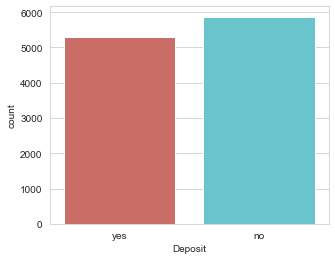

In [138]:
sb.countplot(x='Deposit', data=dataset, palette='hls')

In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
subscription_cat = dataset['Deposit']
subscription_encoded = label_encoder.fit_transform(subscription_cat)
subscription_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [140]:
subscription_status = pd.DataFrame(subscription_encoded, columns=['subscription status'])
dataset.drop(['Deposit'],axis=1, inplace=True)
dataset=pd.concat([dataset,subscription_status],axis=1)
dataset

,Age,Job,Marital Status,Education,Default credit,Balance,Housing loan,Personal loan,Contact type,Days,Month,Duration,Campaign,Pdays,Previous,Poutcome,subscription status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [141]:
print(dataset.nunique())

Age                      76
Job                      12
Marital Status            3
Education                 4
Default credit            2
Balance                3805
Housing loan              2
Personal loan             2
Contact type              3
Days                     31
Month                    12
Duration               1428
Campaign                 36
Pdays                   472
Previous                 34
Poutcome                  4
subscription status       2
dtype: int64


In [142]:
dataset.drop(['Education','Contact type'],axis=1, inplace=True)
dataset

,Age,Job,Marital Status,Default credit,Balance,Housing loan,Personal loan,Days,Month,Duration,Campaign,Pdays,Previous,Poutcome,subscription status
0,59,admin.,married,no,2343,yes,no,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,no,45,no,no,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,no,1270,yes,no,5,may,1389,1,-1,0,unknown,1
3,55,services,married,no,2476,yes,no,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,no,184,no,no,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,no,1,yes,no,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,no,733,no,no,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,no,29,no,no,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,no,0,no,yes,8,may,9,2,172,5,failure,0


In [143]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
job_cat = dataset['Job']
job_encoded = label_encoder.fit_transform(job_cat)
job_encoded[0:168]

array([ 0,  0,  9,  7,  0,  4,  4,  5,  9,  7,  0,  1,  4,  1,  9,  4,  1,
        7,  0,  0,  0,  4,  4,  1, 10,  1,  9,  1,  0,  1,  1,  9,  1,  1,
        1,  4,  1,  4,  4,  2,  1,  4,  2,  1,  4,  1,  9,  3,  9,  1,  1,
        4,  5,  1,  1,  0,  1,  5,  9,  9,  1,  1,  1,  1,  1,  1, 11,  7,
        0,  9,  7,  4,  5,  1,  9,  7,  9,  6,  1,  1,  0,  7,  1,  9,  0,
        9,  4,  9,  1,  4,  0,  1,  0,  1,  7,  4,  9,  9,  1,  1,  7,  1,
        1,  7,  9,  0,  9,  1,  1,  1,  1,  1,  9,  4,  1,  9,  1,  4,  9,
        5,  9,  9,  9,  1,  1,  1,  6,  1,  1,  0,  1,  4,  1,  1,  9,  9,
        7,  1,  6,  0,  1,  4,  0,  0,  4,  7,  1,  7,  5,  2,  0,  0,  1,
        7,  4,  4,  9,  7,  6,  4,  7,  4,  8,  2,  1,  0,  1, 10])

In [144]:
Job_type = pd.DataFrame(job_encoded, columns=['Job category'])
dataset.drop(['Job'],axis=1, inplace=True)
dataset=pd.concat([dataset,Job_type],axis=1)
dataset

,Age,Marital Status,Default credit,Balance,Housing loan,Personal loan,Days,Month,Duration,Campaign,Pdays,Previous,Poutcome,subscription status,Job category
0,59,married,no,2343,yes,no,5,may,1042,1,-1,0,unknown,1,0
1,56,married,no,45,no,no,5,may,1467,1,-1,0,unknown,1,0
2,41,married,no,1270,yes,no,5,may,1389,1,-1,0,unknown,1,9
3,55,married,no,2476,yes,no,5,may,579,1,-1,0,unknown,1,7
4,54,married,no,184,no,no,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,no,1,yes,no,20,apr,257,1,-1,0,unknown,0,1
11158,39,married,no,733,no,no,16,jun,83,4,-1,0,unknown,0,7
11159,32,single,no,29,no,no,19,aug,156,2,-1,0,unknown,0,9
11160,43,married,no,0,no,yes,8,may,9,2,172,5,failure,0,9


## Job Code 
#### 0 Admin
#### 1 Blue-collar
#### 2 Entrepreneur
#### 3 Housemaid
#### 4 Management
#### 5 Retired
#### 6 Self-employed
#### 7 Services
#### 8 Student
#### 9 Technician
#### 10 Unemployed
#### 11 Unknown

In [145]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
previous_cat = dataset['Previous']
previous_encoded = label_encoder.fit_transform(previous_cat)
dataset.drop(['Previous'],axis=1, inplace=True)
Previous_Campaign_type = pd.DataFrame(previous_encoded, columns=['Previous Campaign contact'])
dataset=pd.concat([dataset,Previous_Campaign_type],axis=1)
dataset

,Age,Marital Status,Default credit,Balance,Housing loan,Personal loan,Days,Month,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact
0,59,married,no,2343,yes,no,5,may,1042,1,-1,unknown,1,0,0
1,56,married,no,45,no,no,5,may,1467,1,-1,unknown,1,0,0
2,41,married,no,1270,yes,no,5,may,1389,1,-1,unknown,1,9,0
3,55,married,no,2476,yes,no,5,may,579,1,-1,unknown,1,7,0
4,54,married,no,184,no,no,5,may,673,2,-1,unknown,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,no,1,yes,no,20,apr,257,1,-1,unknown,0,1,0
11158,39,married,no,733,no,no,16,jun,83,4,-1,unknown,0,7,0
11159,32,single,no,29,no,no,19,aug,156,2,-1,unknown,0,9,0
11160,43,married,no,0,no,yes,8,may,9,2,172,failure,0,9,5


In [146]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
loan_cat = dataset['Personal loan']
loan_encoded = label_encoder.fit_transform(loan_cat)

from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
loan_1hot = binary_encoder.fit_transform(loan_encoded.reshape(-1,1))
loan_1hot_mat = loan_1hot.toarray()
loan_DF = pd.DataFrame(loan_1hot_mat, columns=['Having personal Loan','No loan'])
loan_DF.head()

loan_DF.drop(['No loan'],axis=1, inplace=True)
dataset.drop(['Personal loan'],axis=1, inplace=True)
dataset=pd.concat([dataset,loan_DF],axis=1)
dataset

,Age,Marital Status,Default credit,Balance,Housing loan,Days,Month,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact,Having personal Loan
0,59,married,no,2343,yes,5,may,1042,1,-1,unknown,1,0,0,1.0
1,56,married,no,45,no,5,may,1467,1,-1,unknown,1,0,0,1.0
2,41,married,no,1270,yes,5,may,1389,1,-1,unknown,1,9,0,1.0
3,55,married,no,2476,yes,5,may,579,1,-1,unknown,1,7,0,1.0
4,54,married,no,184,no,5,may,673,2,-1,unknown,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,no,1,yes,20,apr,257,1,-1,unknown,0,1,0,1.0
11158,39,married,no,733,no,16,jun,83,4,-1,unknown,0,7,0,1.0
11159,32,single,no,29,no,19,aug,156,2,-1,unknown,0,9,0,1.0
11160,43,married,no,0,no,8,may,9,2,172,failure,0,9,5,0.0


In [147]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
credit_cat = dataset['Default credit']
credit_encoded = label_encoder.fit_transform(credit_cat)

from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
credit_1hot = binary_encoder.fit_transform(credit_encoded.reshape(-1,1))
credit_1hot_mat = credit_1hot.toarray()
credit_DF = pd.DataFrame(loan_1hot_mat, columns=['Having credit','No credit'])

credit_DF.drop(['No credit'],axis=1, inplace=True)
dataset.drop(['Default credit'],axis=1, inplace=True)
dataset=pd.concat([dataset,credit_DF],axis=1)
dataset



,Age,Marital Status,Balance,Housing loan,Days,Month,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact,Having personal Loan,Having credit
0,59,married,2343,yes,5,may,1042,1,-1,unknown,1,0,0,1.0,1.0
1,56,married,45,no,5,may,1467,1,-1,unknown,1,0,0,1.0,1.0
2,41,married,1270,yes,5,may,1389,1,-1,unknown,1,9,0,1.0,1.0
3,55,married,2476,yes,5,may,579,1,-1,unknown,1,7,0,1.0,1.0
4,54,married,184,no,5,may,673,2,-1,unknown,1,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,1,yes,20,apr,257,1,-1,unknown,0,1,0,1.0,1.0
11158,39,married,733,no,16,jun,83,4,-1,unknown,0,7,0,1.0,1.0
11159,32,single,29,no,19,aug,156,2,-1,unknown,0,9,0,1.0,1.0
11160,43,married,0,no,8,may,9,2,172,failure,0,9,5,0.0,0.0


In [148]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
housing_cat = dataset['Housing loan']
housing_encoded = label_encoder.fit_transform(housing_cat)

from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
housing_1hot = binary_encoder.fit_transform(housing_encoded.reshape(-1,1))
housing_1hot_mat = housing_1hot.toarray()
housing_DF = pd.DataFrame(loan_1hot_mat, columns=['Having house loan','No house loan'])

housing_DF.drop(['No house loan'],axis=1, inplace=True)
dataset.drop(['Housing loan'],axis=1, inplace=True)
dataset=pd.concat([dataset,housing_DF],axis=1)
dataset

,Age,Marital Status,Balance,Days,Month,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact,Having personal Loan,Having credit,Having house loan
0,59,married,2343,5,may,1042,1,-1,unknown,1,0,0,1.0,1.0,1.0
1,56,married,45,5,may,1467,1,-1,unknown,1,0,0,1.0,1.0,1.0
2,41,married,1270,5,may,1389,1,-1,unknown,1,9,0,1.0,1.0,1.0
3,55,married,2476,5,may,579,1,-1,unknown,1,7,0,1.0,1.0,1.0
4,54,married,184,5,may,673,2,-1,unknown,1,0,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,1,20,apr,257,1,-1,unknown,0,1,0,1.0,1.0,1.0
11158,39,married,733,16,jun,83,4,-1,unknown,0,7,0,1.0,1.0,1.0
11159,32,single,29,19,aug,156,2,-1,unknown,0,9,0,1.0,1.0,1.0
11160,43,married,0,8,may,9,2,172,failure,0,9,5,0.0,0.0,0.0


In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
marital_cat = dataset['Marital Status']
marital_encoded = label_encoder.fit_transform(marital_cat)

marital_status = pd.DataFrame(marital_encoded, columns=['marital status'])
dataset.drop(['Marital Status'],axis=1, inplace=True)
dataset=pd.concat([dataset,marital_status],axis=1)
dataset

,Age,Balance,Days,Month,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact,Having personal Loan,Having credit,Having house loan,marital status
0,59,2343,5,may,1042,1,-1,unknown,1,0,0,1.0,1.0,1.0,1
1,56,45,5,may,1467,1,-1,unknown,1,0,0,1.0,1.0,1.0,1
2,41,1270,5,may,1389,1,-1,unknown,1,9,0,1.0,1.0,1.0,1
3,55,2476,5,may,579,1,-1,unknown,1,7,0,1.0,1.0,1.0,1
4,54,184,5,may,673,2,-1,unknown,1,0,0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,unknown,0,1,0,1.0,1.0,1.0,2
11158,39,733,16,jun,83,4,-1,unknown,0,7,0,1.0,1.0,1.0,1
11159,32,29,19,aug,156,2,-1,unknown,0,9,0,1.0,1.0,1.0,2
11160,43,0,8,may,9,2,172,failure,0,9,5,0.0,0.0,0.0,1


## Marital status code
#### 0 Unmarried
#### 1 Married
#### 2 Single 

In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
month_cat = dataset['Month']
month_encoded = label_encoder.fit_transform(month_cat)

month_code = pd.DataFrame(month_encoded, columns=['Month'])
dataset.drop(['Month'],axis=1, inplace=True)
dataset=pd.concat([dataset,month_code],axis=1)
dataset

,Age,Balance,Days,Duration,Campaign,Pdays,Poutcome,subscription status,Job category,Previous Campaign contact,Having personal Loan,Having credit,Having house loan,marital status,Month
0,59,2343,5,1042,1,-1,unknown,1,0,0,1.0,1.0,1.0,1,8
1,56,45,5,1467,1,-1,unknown,1,0,0,1.0,1.0,1.0,1,8
2,41,1270,5,1389,1,-1,unknown,1,9,0,1.0,1.0,1.0,1,8
3,55,2476,5,579,1,-1,unknown,1,7,0,1.0,1.0,1.0,1,8
4,54,184,5,673,2,-1,unknown,1,0,0,1.0,1.0,1.0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,unknown,0,1,0,1.0,1.0,1.0,2,0
11158,39,733,16,83,4,-1,unknown,0,7,0,1.0,1.0,1.0,1,6
11159,32,29,19,156,2,-1,unknown,0,9,0,1.0,1.0,1.0,2,1
11160,43,0,8,9,2,172,failure,0,9,5,0.0,0.0,0.0,1,8


## Month Code
#### 0 April
#### 1 August
#### 2 December 
#### 3 Februery
#### 4 Januery
#### 5 July
#### 6 June
#### 7 March
#### 8 May 
#### 9 November
#### 10 October 
#### 11 September

In [152]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Previous_outcome_cat = dataset['Poutcome']
Previous_outcome_encoded = label_encoder.fit_transform(Previous_outcome_cat)

Previous_outcome_code = pd.DataFrame(Previous_outcome_encoded, columns=['Previous Outcome'])
dataset.drop(['Poutcome'],axis=1, inplace=True)
dataset=pd.concat([dataset,Previous_outcome_code],axis=1)
dataset

,Age,Balance,Days,Duration,Campaign,Pdays,subscription status,Job category,Previous Campaign contact,Having personal Loan,Having credit,Having house loan,marital status,Month,Previous Outcome
0,59,2343,5,1042,1,-1,1,0,0,1.0,1.0,1.0,1,8,3
1,56,45,5,1467,1,-1,1,0,0,1.0,1.0,1.0,1,8,3
2,41,1270,5,1389,1,-1,1,9,0,1.0,1.0,1.0,1,8,3
3,55,2476,5,579,1,-1,1,7,0,1.0,1.0,1.0,1,8,3
4,54,184,5,673,2,-1,1,0,0,1.0,1.0,1.0,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,1.0,1.0,1.0,2,0,3
11158,39,733,16,83,4,-1,0,7,0,1.0,1.0,1.0,1,6,3
11159,32,29,19,156,2,-1,0,9,0,1.0,1.0,1.0,2,1,3
11160,43,0,8,9,2,172,0,9,5,0.0,0.0,0.0,1,8,0


<AxesSubplot:>

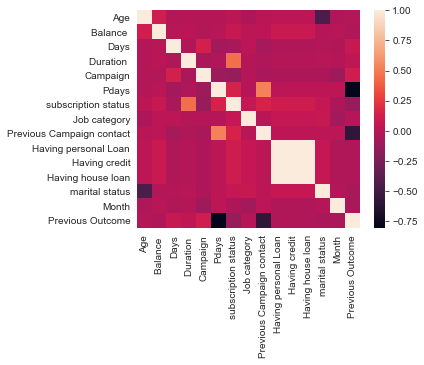

In [161]:
sb.heatmap(dataset.corr())

In [163]:
dataset.drop(['Having house loan','Having credit',],axis=1, inplace=True)
dataset

,Age,Balance,Days,Duration,Campaign,Pdays,subscription status,Job category,Previous Campaign contact,Having personal Loan,marital status,Month,Previous Outcome
0,59,2343,5,1042,1,-1,1,0,0,1.0,1,8,3
1,56,45,5,1467,1,-1,1,0,0,1.0,1,8,3
2,41,1270,5,1389,1,-1,1,9,0,1.0,1,8,3
3,55,2476,5,579,1,-1,1,7,0,1.0,1,8,3
4,54,184,5,673,2,-1,1,0,0,1.0,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,1.0,2,0,3
11158,39,733,16,83,4,-1,0,7,0,1.0,1,6,3
11159,32,29,19,156,2,-1,0,9,0,1.0,2,1,3
11160,43,0,8,9,2,172,0,9,5,0.0,1,8,0


In [164]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('subscription status',axis=1),
                                                    dataset['subscription status'], test_size=0.3,)

In [165]:
print(X_train.shape)
print(y_train.shape)

(7813, 12)
(7813,)


In [166]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [167]:
y_pred = LogReg.predict(X_test)

In [168]:
set(y_pred)

{0, 1}

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1790
           1       0.76      0.71      0.73      1559

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



In [170]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train,y_train_pred)

array([[3341,  742],
       [1180, 2550]], dtype=int64)

In [171]:
dataset[0:1]

,Age,Balance,Days,Duration,Campaign,Pdays,subscription status,Job category,Previous Campaign contact,Having personal Loan,marital status,Month,Previous Outcome
0,59,2343,5,1042,1,-1,1,0,0,1.0,1,8,3


In [172]:
test_subscription = np.array([59,2343,5,1042,1,-1,0,0,1,1,8,3]).reshape(1,-1)
print(LogReg.predict(test_subscription))

[1]
